

## PCA and LDA

For intuition we want to project the points in 3D space using PCA and LDA.

In [15]:
# %matplotlib qt
%matplotlib inline

In [16]:
import random
import scipy.stats as st
import numpy as np
import math
from math import gamma, pi
import time
import scipy
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy.random as rnd
import pickle
import os.path
from deap import creator, base, tools, algorithms
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns; sns.set()
import  mpl_toolkits.mplot3d
from mpl_toolkits.mplot3d import Axes3D

In [17]:
# GET POINTS OF THE FIRST 10 ITERATIONS OF THE PCA FOR FOUR-BIT PROCESSOR:
model_index = 3     # 4 bit processor if !

base_paths_opt = [os.path.join("..", "results_opt")]
model_str = '0'+str(model_index+1)+'_'

ga_solutions = False
local_solutions = True

region_files = []
for base_path_opt in base_paths_opt:
    if ga_solutions:
        region_files.append(os.path.join(base_path_opt, model_str+"bioprocViableSet_IterGA.p"))
    if local_solutions:
        for i in range(0, 10):
            region_files.append(os.path.join(base_path_opt, model_str+"bioproc_Region0ViableSet_Iter" + str(i+1) + ".p"))

print(region_files)

viablePoints = []
group_sizes = []
for region_file in region_files: 
    viablePointsRegion = pickle.load(open(region_file, "rb")) 
    group_sizes.append( viablePointsRegion.shape[0] )
    viablePoints.extend(viablePointsRegion)
    
viablePoints = np.array(viablePoints)
    
print("Number of points ("+str(model_index+1)+"-bit):",len(viablePoints))
print(type(viablePoints))
print(viablePoints.shape)

# pcaAll10 = viablePoints
# import scipy.io
# scipy.io.savemat('pcaAll10.mat', {'pcaAll10': pcaAll10})

group_sizes

['..\\results_opt\\04_bioproc_Region0ViableSet_Iter1.p', '..\\results_opt\\04_bioproc_Region0ViableSet_Iter2.p', '..\\results_opt\\04_bioproc_Region0ViableSet_Iter3.p', '..\\results_opt\\04_bioproc_Region0ViableSet_Iter4.p', '..\\results_opt\\04_bioproc_Region0ViableSet_Iter5.p', '..\\results_opt\\04_bioproc_Region0ViableSet_Iter6.p', '..\\results_opt\\04_bioproc_Region0ViableSet_Iter7.p', '..\\results_opt\\04_bioproc_Region0ViableSet_Iter8.p', '..\\results_opt\\04_bioproc_Region0ViableSet_Iter9.p', '..\\results_opt\\04_bioproc_Region0ViableSet_Iter10.p']
Number of points (4-bit): 3345
<class 'numpy.ndarray'>
(3345, 12)


[428, 199, 105, 141, 141, 188, 218, 393, 569, 963]

In [18]:
# make a group vector:
group_ids = []
for i in range(len(group_sizes)):
    dodatek = np.ones((group_sizes[i]))*(i+1)
    group_ids.extend(dodatek)
# print(len(group_ids))
# print(group_ids)

In [19]:
nDims = viablePoints.shape[1]

pca = PCA(n_components=3)
pca.fit( viablePoints )
components = pca.components_
# print(components)
# print( pca.components_.shape )
# print( pca.explained_variance_ratio_ )
# print(pca.singular_values_)
#print(np.linalg.norm(pca.components_, axis = 0))     # [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
transformedViable = pca.transform(viablePoints)
print(transformedViable.shape)
# print(transformedViabePoints[0,:])

# pca10 = viablePoints
# import scipy.io
# scipy.io.savemat('pca10.mat', {'pca10': transformedViable})

(3345, 3)


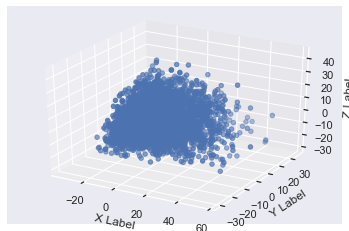

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')



ax.scatter(transformedViable[:,0], transformedViable[:,1], transformedViable[:,2], marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [21]:
lda = LinearDiscriminantAnalysis(n_components=3)

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X, y)

transformed = lda.fit_transform(X, y)

print( transformed )

[[-1.73205081]
 [-1.73205081]
 [-3.46410162]
 [ 1.73205081]
 [ 1.73205081]
 [ 3.46410162]]


In [22]:
lda = LinearDiscriminantAnalysis(n_components=3)
lda_transformed = lda.fit_transform( viablePoints , group_ids)
print(lda_transformed.shape)

(3345, 3)


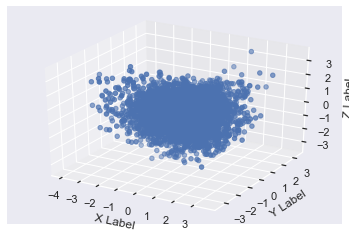

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')



ax.scatter(lda_transformed[:,0], lda_transformed[:,1], lda_transformed[:,2], marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()